In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Datos.xlsx")
df

,ingresos,consumo
0,44.617090,9.720475
1,73.430827,12.340257
2,5.010866,1.535624
3,33.721594,7.879812
4,18.941810,4.721109
...,...,...
995,97.568330,10.996982
996,34.611777,8.115961
997,68.535678,12.183459
998,35.966885,8.694838


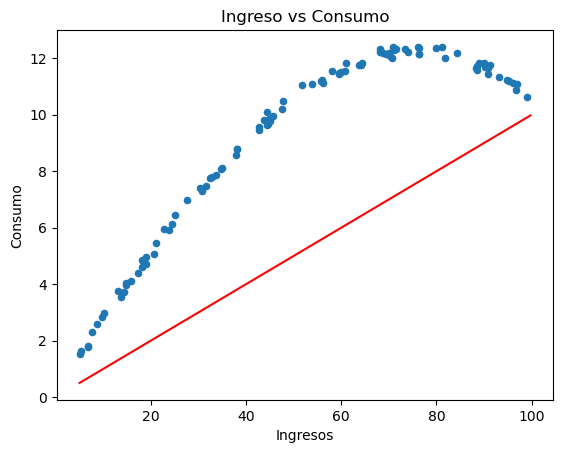

In [3]:
df_100primeros = df.head(100)

df_100primeros.plot.scatter(x='ingresos', y = 'consumo')

x_recta = np.linspace(min(df['ingresos']),max(df['ingresos']), 100)

w = 0.1

plt.plot(x_recta, w*x_recta, color='red')

plt.xlabel('Ingresos')
plt.ylabel('Consumo')
plt.title('Ingreso vs Consumo')
plt.show()

### Función de coste:

---------------------------------------------
Valor minimo de la función:  5.042604832425227
Con un valor de parametro w de:  0.16
---------------------------------------------


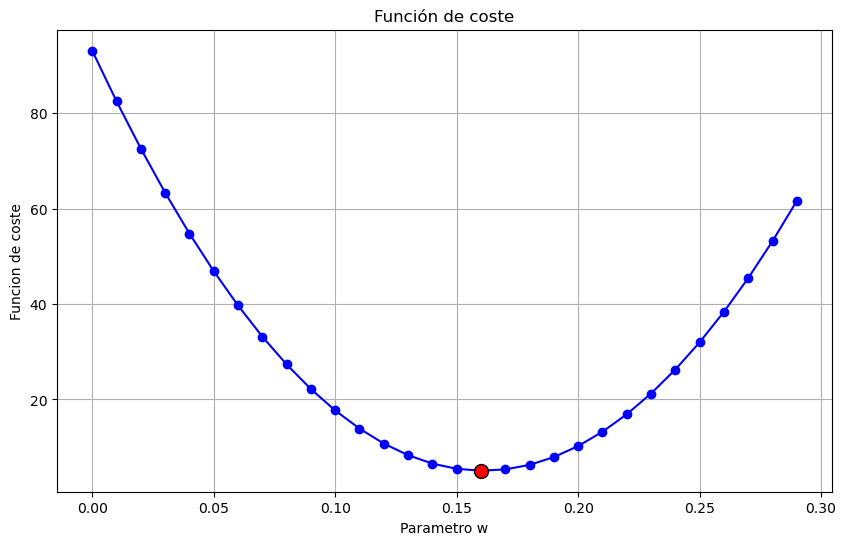

In [4]:
ingresos = df_100primeros["ingresos"]
consumo = df_100primeros["consumo"]

num_muestra = ingresos.shape[0]


w_funcion_coste=[]
funcion_coste=[]


for i in np.arange(0,0.3,0.01):
    sumatoria = 0
    for j in np.arange(0,100, 1):
        sustracción = ((i * ingresos.iloc[j]) - consumo.iloc[j])
        potencia = sustracción * sustracción
        sumatoria = sumatoria + potencia
    division = (sumatoria/100)
    w_funcion_coste.append(i)
    funcion_coste.append(division)




serie_sumatoria = pd.Series(funcion_coste)
serie_w_usados = pd.Series(w_funcion_coste)

valor_minimo = serie_sumatoria.min()
indice_minimo =serie_sumatoria.idxmin()
w_minimo = serie_w_usados.iloc[indice_minimo]

print("---------------------------------------------")
print("Valor minimo de la función: ",valor_minimo)
print("Con un valor de parametro w de: ", w_minimo) 
print("---------------------------------------------")

plt.figure(figsize=(10 , 6))
plt.plot(w_funcion_coste, funcion_coste, marker='o', linestyle='-', color='b')

plt.scatter(w_minimo, valor_minimo, color='red', s=100, edgecolor='black', zorder=5, label='Mínimo')

plt.xlabel('Parametro w')
plt.ylabel('Funcion de coste')
plt.title('Función de coste')
plt.grid(True)
plt.show()


### Valor optimo de w usando ecuación normal

In [5]:
sum_xy=0
sum_xx=0
for i in range(0,100,1):
    mult_xy = ingresos.iloc[i] * consumo.iloc[i]
    sum_xy = sum_xy + mult_xy
    
    mult_xx = ingresos.iloc[i] * ingresos.iloc[i]
    sum_xx = sum_xx + mult_xx

w_optimo = (sum_xy/sum_xx)
print("---------------------------------------------")
print(w_optimo)
print("---------------------------------------------")

---------------------------------------------
0.1609789136201636
---------------------------------------------


#### Usando ambos metodos llegamos al mismo w optimo (0.16)

### Graficamos:

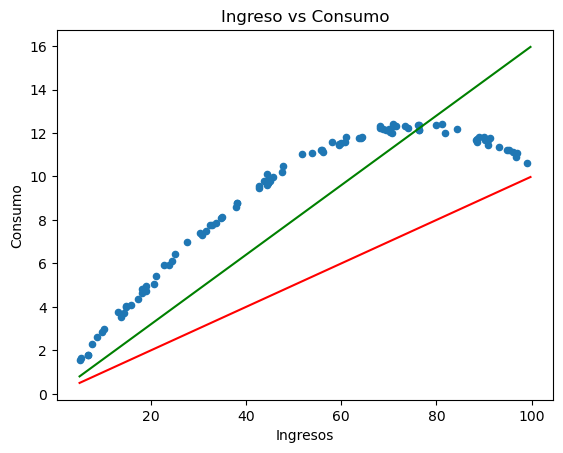

In [6]:
df_100primeros.plot.scatter(x='ingresos', y = 'consumo')

x_recta = np.linspace(min(df['ingresos']),max(df['ingresos']), 100)

w_hipotesis = 0.1
w_optimo = 0.16

plt.plot(x_recta, w_hipotesis*x_recta, color='red')
plt.plot(x_recta , w_optimo*x_recta, color='green')

plt.xlabel('Ingresos')
plt.ylabel('Consumo')
plt.title('Ingreso vs Consumo')
plt.show()

### Curva de aprendizaje:

In [16]:
ingresos_1000 = df["ingresos"]
consumo_1000 = df["consumo"]

funcion_coste_muestra=[]
funcion_coste_poblacion=[]
numero_muestra = []
numero_muestra_2 = []
w = 0.16

sumatoria_2 = 0

for n in range(1,201,1):
    sumatoria_2=0
    for i in range(1,201,1):
        sumatoria = 0
        for j in range(1,201,1):
            sustraccion = ((w*ingresos_1000.iloc[j]) - consumo_1000.iloc[j])
            potencia = sustraccion * sustraccion
            sumatoria = sumatoria + potencia
        division_1 = sumatoria / i
        sumatoria_2 = sumatoria_2 + division_1
    division_2 = sumatoria_2 / n
    funcion_coste_muestra.append(division_2)
    numero_muestra.append(n)


    N = 1000-n
    sumatoria_2=0
    for i in range(1,N,1):
        sumatoria = 0
        for j in range(1,N,1):
            sustraccion = ((w*ingresos_1000.iloc[j]) - consumo_1000.iloc[j])
            potencia = sustraccion * sustraccion
            sumatoria = sumatoria + potencia
        division_1 = sumatoria / i
        sumatoria_2 = sumatoria_2 + division_1
    division_2 = sumatoria_2 / N
    funcion_coste_poblacion.append(division_2)
    numero_muestra_2.append(N)

    


#for n in range(10,201,1):
#    N = 1000 - n

#    division = 0
#    sumatoria = 0
#    for i in range(n):
#        sustracción = ((0.16 * ingresos_1000.iloc[i]) - consumo_1000.iloc[i])
#        potencia = sustracción * sustracción
#        sumatoria = sumatoria + potencia
    
#    for i in range(n):
#        sum_2 = sumatoria / i

#    sum_3 = (sum_2 / n)    

#    funcion_coste_muestra.append(sum_3)
#    numero_muestra.append(n)

#    for i in range(N):
#        sum_4 = sumatoria / i

#    sum_5 = (sum_4 / N)    
    
    #numero_muestra.append(n)
#    funcion_coste_poblacion.append(sum_5)
        

plt.figure(figsize=(10 , 6))
plt.plot(numero_muestra, funcion_coste_muestra, marker='o', linestyle='-', color='blue')
plt.plot(numero_muestra_2, funcion_coste_poblacion, marker='o', linestyle='-', color='red')


plt.xlabel('Cantidad de la muestra')
plt.ylabel('Funcion de coste')
plt.title('Curva de aprendizaje')
plt.grid(True)
plt.show()




KeyboardInterrupt: 

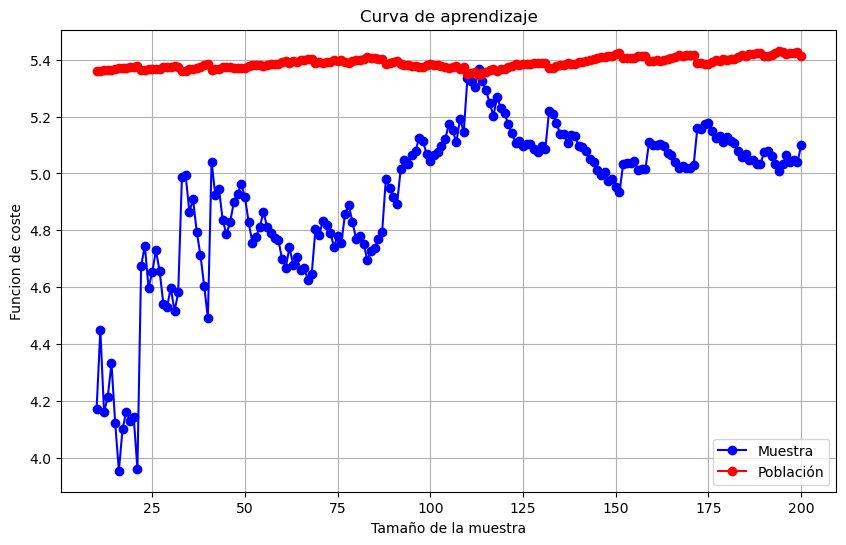

In [18]:
ingresos_1000 = df["ingresos"]
consumo_1000 = df["consumo"]

funcion_coste_muestra = []
funcion_coste_poblacion = []
numero_muestra = []
w_optimo = 0.16  

for n in range(10, 201, 1):
    sumatoria_muestra = 0
    for i in range(n):
        h_x_i = w_optimo * ingresos_1000.iloc[i]
        y_i = consumo_1000.iloc[i]
        J_i = (h_x_i - y_i) ** 2  
        sumatoria_muestra += J_i
    error_muestra = sumatoria_muestra / n  
    funcion_coste_muestra.append(error_muestra)


    N = 1000 - n
    sumatoria_poblacion = 0
    for j in range(n, 1000):
        h_x_j = w_optimo * ingresos_1000.iloc[j]
        y_j = consumo_1000.iloc[j]
        J_j = (h_x_j - y_j) ** 2
        sumatoria_poblacion += J_j
    error_poblacion = sumatoria_poblacion / N  
    funcion_coste_poblacion.append(error_poblacion)

    numero_muestra.append(n)


plt.figure(figsize=(10, 6))
plt.plot(numero_muestra, funcion_coste_muestra, marker='o', linestyle='-', color='blue', label="Muestra")
plt.plot(numero_muestra, funcion_coste_poblacion, marker='o', linestyle='-', color='red', label="Población")
plt.xlabel('Tamaño de la muestra')
plt.ylabel('Funcion de coste')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()
